<a href="https://colab.research.google.com/github/CarlosSMWolff/Quantum-Optics-Course/blob/main/4_Open_quantum_systems_Strong_coupling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qutip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from qutip import *
import numpy as np
from numpy import sqrt, log10
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
Ncav = 3
a = tensor(destroy(Ncav),qeye(2))
sigma = tensor(qeye(Ncav), destroy(2))

In [ ]:
def H_fun(params):
  g, Delta, Omega = params
  return Delta*(a.dag()*a + sigma.dag()*sigma)+ Omega*(sigma + sigma.dag()) +  g*(a.dag()*sigma + a*sigma.dag())


In [ ]:
kappa = 1; gamma = 0.05; 

c_ops = [sqrt(kappa)*a, sqrt(gamma)*sigma]

def qubit_pop(params):
  H = H_fun(params)
  rho = steadystate(H, c_ops )
  return expect(a.dag()*a, rho)

In [ ]:
Omega = 0.0001; 

Deltamin, Deltamax, nDelta = -1, 1, 100
Deltagrid = np.linspace(Deltamin,Deltamax, nDelta)
gmin, gmax, ng = 0.05, 1, 50
ggrid = np.logspace(log10(gmin), log10(gmax), ng)

In [ ]:
spectrum = np.asarray([[ qubit_pop([g, Delta, Omega]) for Delta in Deltagrid] for g in tqdm(ggrid) ])
normalization = np.expand_dims(np.max(spectrum,axis=1),-1)
spectrum_normalized = spectrum/normalization

100%|██████████| 50/50 [00:21<00:00,  2.38it/s]


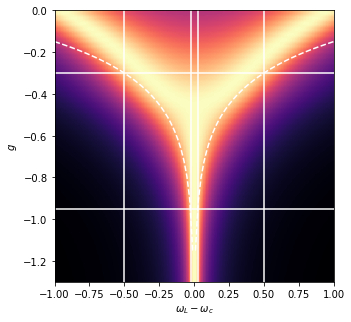

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow((np.flip(spectrum_normalized,axis=0))**0.5, extent=[Deltamin,Deltamax,log10(gmin),log10(gmax)], aspect = 'auto', cmap = 'magma')
#plt.plot(Deltagrid, np.log10(np.abs(Deltagrid)), 'r--')
ax.plot(Deltagrid, np.log10(sqrt(np.abs(Deltagrid)*kappa/2)), 'w--')

# Bad-cavity limit
ax.axhline(log10(sqrt(kappa*gamma/4)),color='white')
# 
ax.axhline(log10(kappa/2),color='white')

ax.axvline(gamma/2,color='white')
ax.axvline(-gamma/2,color='white')

ax.axvline(kappa/2,color='white')
ax.axvline(-kappa/2,color='white')

plt.ylim(log10(gmin),log10(gmax))
ax.set_xlabel("$\omega_L-\omega_c$")
ax.set_ylabel("$g$")

plt.savefig("plot.pdf")
plt.show()



This plot illustrates the different regimes:

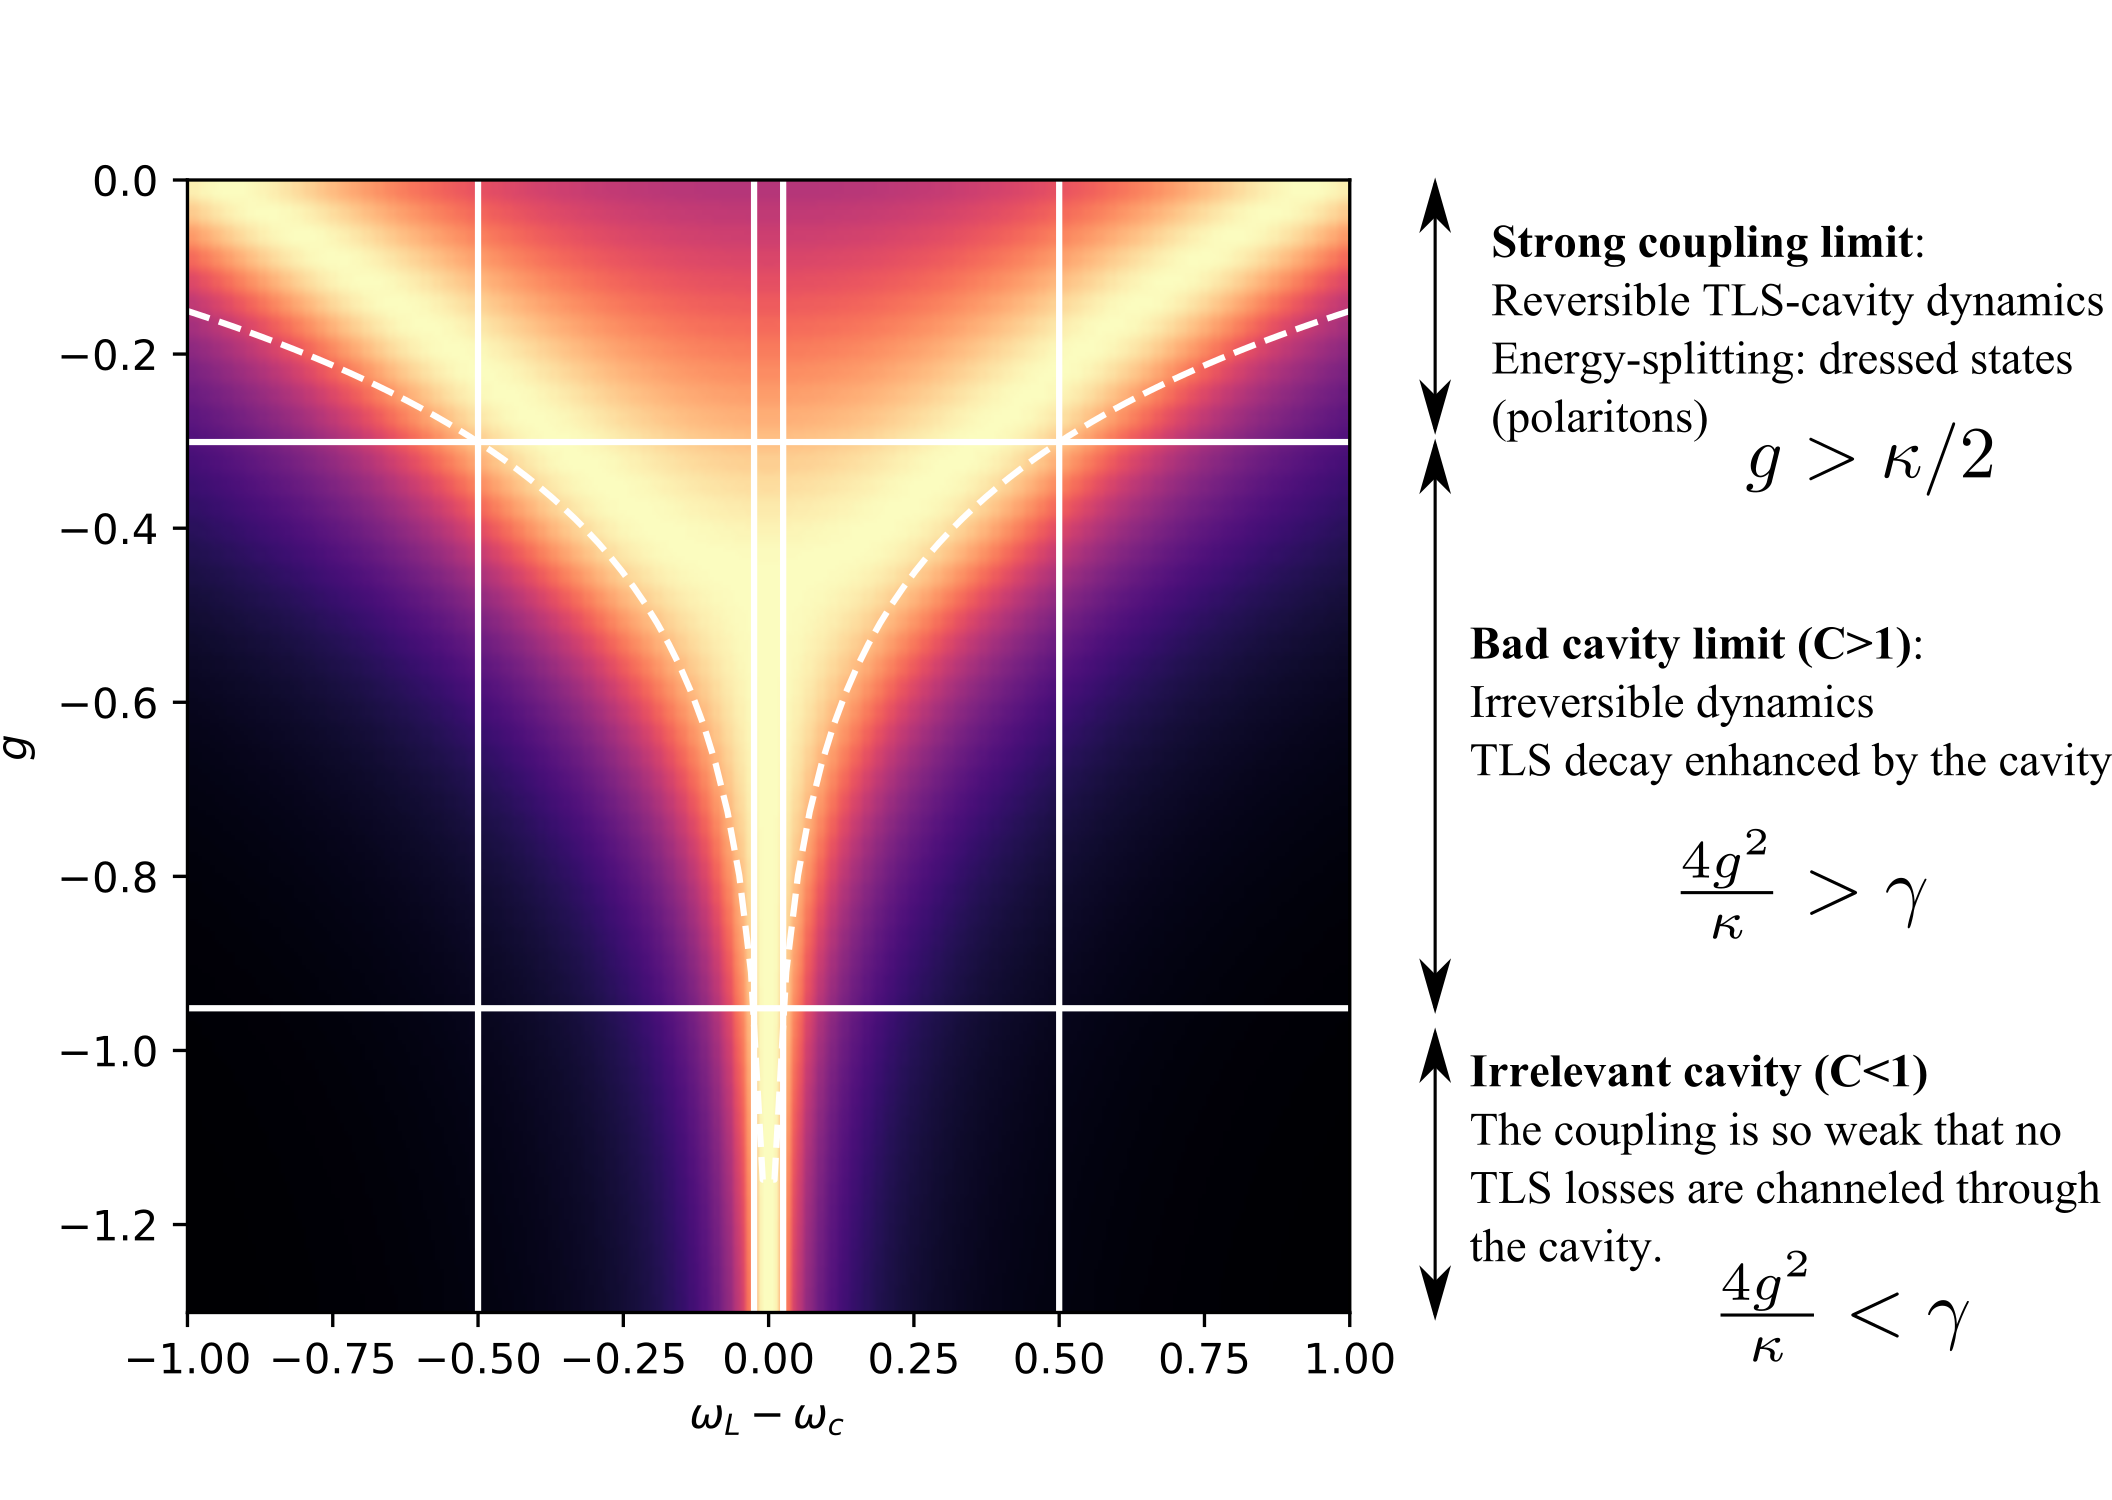